In [1]:
import pandas as pd
import numpy as np
import os
import xarray as xr
import h5py
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
# del ubaro
# del precip
dates_daily        = pd.date_range(start="2000-06-01", end="2023-08-31", freq="D")


# Open a NetCDF file
ds = nc.Dataset('/work/kaichiht/Colab/2025_research/PeterChang_westerly_duct_ERA5/ubaro_anomaly.nc', 'r')  # 'r' is for read mode

# Access data
ubaro = ds.variables['ubaro'][152:,:,:] # drop data before Jun 1st

# Open a NetCDF file
ds = nc.Dataset('/work/kaichiht/Colab/2025_research/PeterChang_westerly_duct_ERA5/IMERG_anomaly.nc', 'r')  # 'r' is for read mode

# Access data
precip = ds.variables['precipitation'][:]
lat    = ds.variables['lat'][:]
lon    = ds.variables['lon'][:]
# Close the dataset
ds.close()


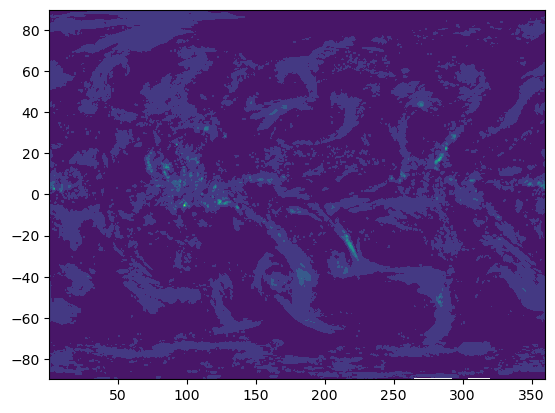

In [3]:
x,y = np.meshgrid(lon,lat)
plt.figure()
plt.contourf(x,y,precip[0,:])



In [4]:
# make precipitation index
weight     = np.cos(y/180*np.pi)**0.5
lat_cond   = np.where((lat>=-5)&(lat<=5))[0] 
precip_idx = np.mean((precip*weight)[:,lat_cond[0]:lat_cond[-1]+1,:],axis=(1,2))
precip_idx = (precip_idx-np.mean(precip_idx))/np.std(precip_idx)

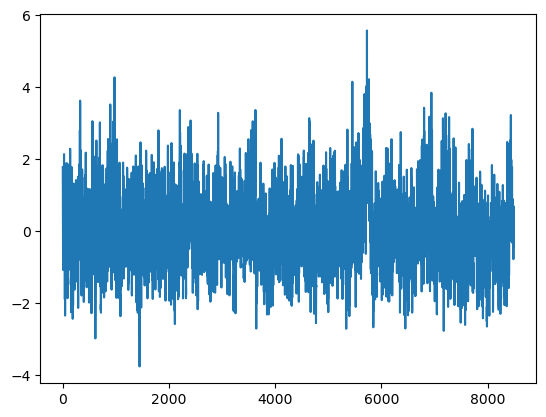

In [11]:
plt.figure()
plt.plot(precip_idx)

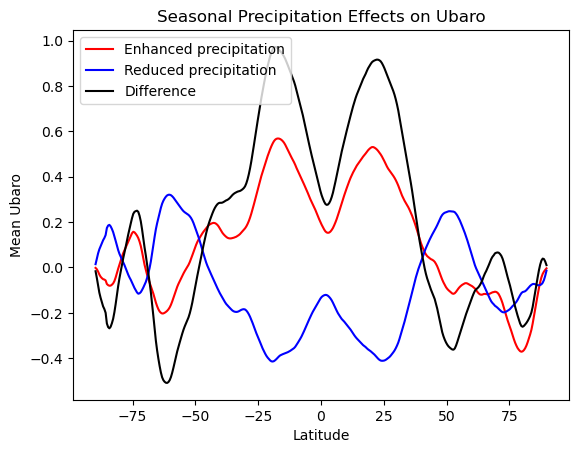

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming precip_idx, dates_daily, lat, and ubaro are already defined in your environment
# Use logical AND (&) and OR (|) to filter indices for specific months and precipitation conditions
# posi_1sigma_p = np.where((precip_idx > 0.5) & ((dates_daily.month == 12) | (dates_daily.month == 1) | (dates_daily.month == 2)))
# posi_1sigma_n = np.where((precip_idx < -0.5) & ((dates_daily.month == 12) | (dates_daily.month == 1) | (dates_daily.month == 2)))
posi_1sigma_p = np.where((precip_idx > 1) )
posi_1sigma_n = np.where((precip_idx < -1) )

# Access the first element of the tuple (which is the array of indices) and add 5 to each element
posi_1sigma_p = posi_1sigma_p[0] + 15
posi_1sigma_n = posi_1sigma_n[0] + 15

# Ensure indices do not exceed your maximum index (7883 in this case)
posi_1sigma_p = posi_1sigma_p[posi_1sigma_p <= 7883]
posi_1sigma_n = posi_1sigma_n[posi_1sigma_n <= 7883]

# Create the plot
plt.figure()

# Plot for enhanced precipitation
plt.plot(lat, ubaro[posi_1sigma_p,:,:].mean(axis=(0,2)), 'r', label='Enhanced precipitation')

# Plot for reduced precipitation
plt.plot(lat, ubaro[posi_1sigma_n,:,:].mean(axis=(0,2)), 'b', label='Reduced precipitation')

# Plot for the difference
plt.plot(lat, ubaro[posi_1sigma_p,:,:].mean(axis=(0,2)) - ubaro[posi_1sigma_n,:,:].mean(axis=(0,2)), 'k', label='Difference')

# Add a legend
plt.legend()

# Optional: Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Mean Ubaro')
plt.title('Seasonal Precipitation Effects on Ubaro')

# Show the plot
plt.show()
